## Support vector machine applicate a XOR

In [1]:
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
import numpy as np
from sklearn import svm

In [3]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

plt.style.use('fivethirtyeight')

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.serif'] = 'Ubuntu'
plt.rcParams['font.monospace'] = 'Ubuntu Mono'
plt.rcParams['font.size'] = 10
plt.rcParams['axes.labelsize'] = 10
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.titlesize'] = 10
plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['figure.titlesize'] = 12
plt.rcParams['image.cmap'] = 'jet'
plt.rcParams['image.interpolation'] = 'none'
plt.rcParams['figure.figsize'] = (16, 8)
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.markersize'] = 8

colors = ['#008fd5', '#fc4f30', '#e5ae38', '#6d904f', '#8b8b8b', '#810f7c', 
'#137e6d', '#be0119', '#3b638c', '#af6f09', '#008fd5', '#fc4f30', '#e5ae38', '#6d904f', '#8b8b8b', 
'#810f7c', '#137e6d', '#be0119', '#3b638c', '#af6f09']

cmap = mcolors.LinearSegmentedColormap.from_list("", ["#82cafc", "#069af3", "#0485d1", colors[0], colors[8]])

In [4]:
plot_colors = [colors[0], colors[1], colors[2]]
cMap = mcolors.ListedColormap(colors[0:3])

In [5]:
xx, yy = np.meshgrid(np.linspace(-3, 3, 500),
                     np.linspace(-3, 3, 500))
np.random.seed(0)
X = np.random.randn(300, 2)
Y = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0)

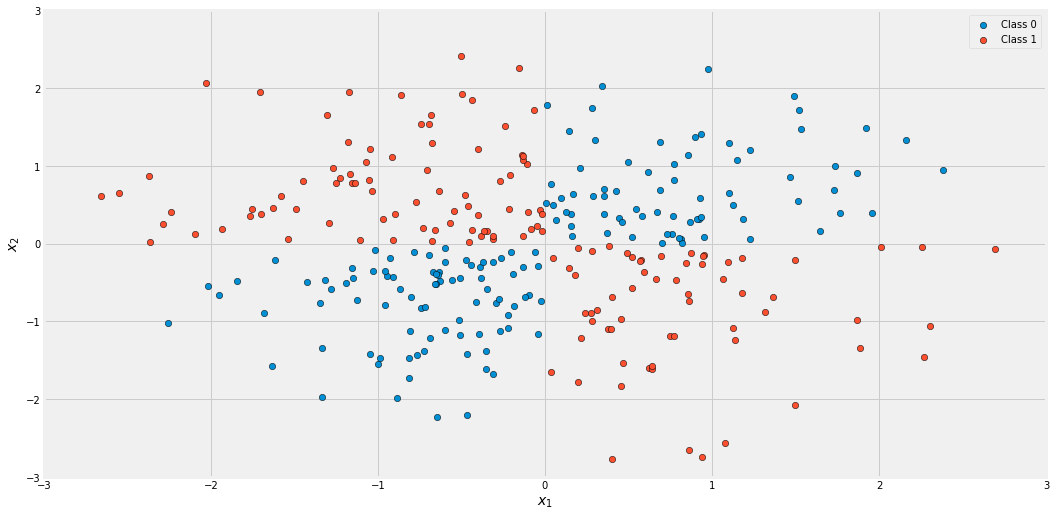

In [6]:
fig = plt.figure()
fig.patch.set_facecolor('white')
ax = fig.gca()
for i, c in zip(range(2), plot_colors):
    idx = np.where(Y == i)
    plt.scatter(X[idx, 0], X[idx, 1], c=c, edgecolors='k', s=40, label='Class {0:d}'.format(i),cmap=cMap)
plt.xlabel('$x_1$', fontsize=14)
plt.ylabel('$x_2$', fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.legend()
plt.show()

In [26]:
# fit the model
clf= svm.SVC(gamma=10)
#clf=svm.SVC(kernel='linear')
#clf=svm.SVC(kernel='poly', degree=3, coef0=1)
#clf=svm.SVC(kernel='sigmoid', gamma=.8)
clf.fit(X, Y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=10, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

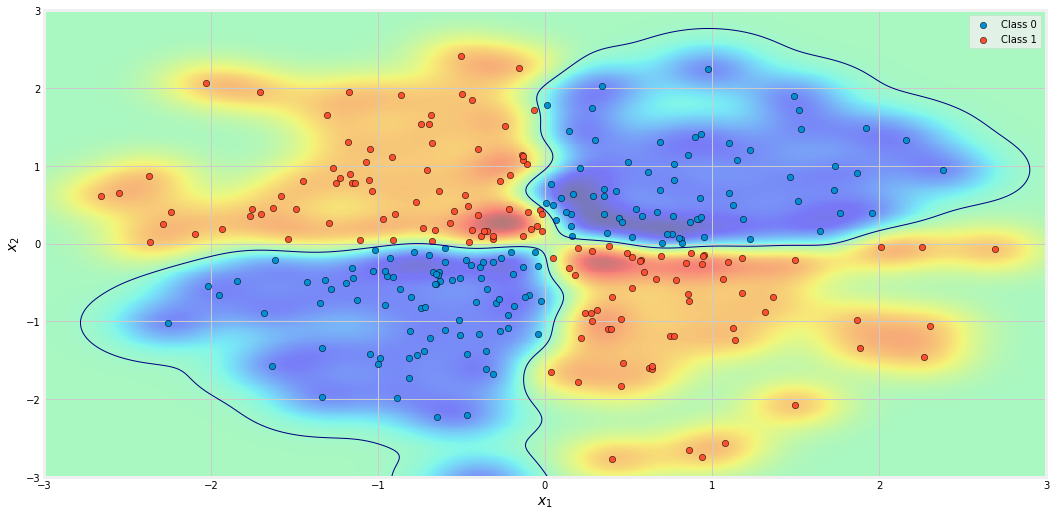

In [27]:
# plot the decision function for each datapoint on the grid
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

fig = plt.figure()
fig.patch.set_facecolor('white')
ax = fig.gca()
imshow_handle = plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()), aspect='auto',
           origin='lower', alpha=.5)
contours = plt.contour(xx, yy, Z, levels=[0], linewidths=1,
                       linetypes='--')
for i, c in zip(range(2), plot_colors):
    idx = np.where(Y == i)
    plt.scatter(X[idx, 0], X[idx, 1], c=c, edgecolors='k', s=40, label='Class {0:d}'.format(i),cmap=cMap)
plt.xlabel('$x_1$', fontsize=14)
plt.ylabel('$x_2$', fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.legend()
plt.show()

In [28]:
print('Accuracy: {0:3.5f}'.format(np.sum(Y==clf.predict(X))/float(X.shape[0])*100))

Accuracy: 100.00000
